# Classification I: Generative models

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/git/https%3A%2F%2Fgitlab.in2p3.fr%2Fenergy4climate%2Fpublic%2Feducation%2Fmachine_learning_for_climate_and_energy/master?filepath=book%2Fnotebooks%2F05_classification_generative.ipynb)

<div class="alert alert-block alert-warning">
    <b>Prerequisites</b>
    
- Understand and apply Bayes Theorem

</div>

<div class="alert alert-block alert-info">
    <b>Learning Outcomes</b>
    
- Define the Bayes decision boundary
- Derive a Linear discriminant analysis to solve a classification problem
- Define and Understand how to apply a Naive Bayses classifier to solve a classification problem
    
</div>

## Introduction

Weather, clouds, seasons, wind, hurricane... Categories and classifications are everywhere in environmental sciences. They can be artificially created based on thresholds (as in the hurricane example below) or they can correspond to truly **discrete variable** (e.g. "It's raining, it's not raining").


<img alt="saphir" src="images/saphir_scale.png" width=400 style="float:center">

To use proper terminology, we say that categorical variables are **qualitative** (can be described with words) whereas variables that reflect a notion of magnitude are **quantitative** (can be measured).

In the example above, you can describe with words what a hurricane of category 3 is. However, you cannot describe what a wind of 100 km/h is.

### Weather icons

- We have already derived methods to predict *quantitative* variables (variables that vary continuously).
- In many problems however, the variable we are trying to predict is *qualitative* (takes discrete values).
- Complex meteorological situation often summarized by a pictogram/a warning, e.g. Cat 5, hurricane, storm warning...
- Helps establishing an appropriate response plan based on the forecast. 

#### Illustration of the transition between quantitative and qualitative variables

<div style="float:left; width:100%">
<img alt="weather" src="images/weather.png" style="float:left">
<img alt="Weather icons" src="images/weather-icons.jpg" style="float:right">
</div>
    
**Figure:** Weather map for a given day and the corresponding weather icons that one can use to produce a weather report.

## Case study: Rain prediction

<div style="float:left; width:55%">
 <ul>
     <li>Predicting the rain remains a challenge.</li>
    <li>It results from multi-scale phenomena:</li>
     <ul>
        <li>from the large-scale organization of weather system</li>
        <li>to the small scale microphysics of dropplet formation.</li>
     </ul>
    <li>Dynamical models attempt to capture all these scales.</li>
     <li>Yet, apparent correspondance between <em>surface pressure</em> and <em>weather<em>.</li>
    </ul>
</div>

<div style="float:right; width:45%">
<img alt="Barometer" src="images/barometer.jpg" width="100%">
</div>

## Classification as a Supervised Learning Problem

### Setting up the problem

Let $\boldsymbol{X}$ be a multivariate random vector describing the state of the atmosphere.

**Problem:** classify the current weather into a category $C$ within a set of $K$ categories.

**Example:**
  - Let $\boldsymbol{X}$ represent pressure and temperature.
  - We are given two categories:
    - $k=0$: not raining, 
    - $k=1$: raining.
  - $k\in\{0,1\}$ is a realization of the random variable $C$ (with $K = 2$).

Like regression, this is a *supervised learning problem*, but with a discrete target instead of a continuous one.

We want to learn the conditional probability distribution $P(C = k | \boldsymbol X = \boldsymbol x)$ for all $k$ and $\boldsymbol x$ from a training dataset $(\boldsymbol x_i, k_i), 1 \le i \le N$.

Each $x_i$ is an input and each $k_i$ a target class.

See [Supervised Learning Problem](02_supervised_learning_problem.ipynb).

The $X_j, 1 \le j \le p$ and $C$ are random variables, but the former may be continuous (or not) while the latter is discrete.

Hence, there exists a joint Probability Distribution Function (PDF) 

\begin{equation}
f_\boldsymbol{X}(\boldsymbol{x})
\end{equation}

that describes how likely it is to observe weather $\boldsymbol{x}$.

There also exists a discrete probability distribution

\begin{equation}
P(C=k)
\end{equation}

to observe either event $k = 0$ or $k = 1$.

> ***Question***
> - What are the two conditions required for $f_X$ to be a PDF?

### Bayes Classifier
<hr>

**Bayes classifier**
<br>
The classifier that assigns to $\boldsymbol{x}$ the class $k$ that is most probable given $\boldsymbol{x}_i$.

<hr>

**Bayes classifier problem:** For a given $\boldsymbol{x}$, estimate the probability of events $k$, i.e

\begin{equation}
    P(C = k | \boldsymbol{X} = \boldsymbol{x})\, .
\end{equation}

### Bayes Decision boundary

<hr>

**Bayes Decision Boundary for 2 Classes**
<br>
The set of points $\boldsymbol{x}$ such that

\begin{equation}
    P(C = 0 | \boldsymbol X = \boldsymbol{x}) = P(C = 1 | \boldsymbol X = \boldsymbol x)\, ,
\end{equation}

i.e the part of the input domain for which the conditional probability of belonging to each class is equal.

<hr>

**Equivalent Bayes classifier problem:** find this decision boundary.

<hr>

**Bayes Decision Boundary for $K \ge 2$ Classes**
<br>
The boundary given by the union of the Bayes Decision Boundaries for all pair of classes $(k, l)$, for $0 \le k, l \le K - 1$.

<hr>

### A First Classification Model

<hr>

**Linear Classifiers**
<br>

Classifiers for which the decision boundary is given by a linear equation in $\boldsymbol x$.
<hr>

**Example:** provide a classification rain/no rain given the pressure predictor $x$.

From our observations, we have an estimate of the probability of rain/no rain conditionned on pressure.

We plot the densities of these conditional probability distributions in the following figure.

<div class="alert alert-block alert-warning">
    <b>Warning</b>
    
Here, the direct estimation of the conditional PDFs is possible thanks to the low dimensionality of the input space ($p = 1$).

</div>

In [9]:
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', size=14)

# figure inspired from https://www.astroml.org/book_figures/chapter9/fig_bayes_DB.html
def gaussian(x, mu, sigma):
  return 1 / (np.sqrt(2 * np.pi) * sigma) * np.exp(-((x - mu) / sigma)**2 / 2)

pressure = np.linspace(-5, 10, 1000) # pressure distribution (fake units)

# Non-conditional probabilities
p_rain = 0.3  # that it is raining
p_norain = 1 - p_rain  # that it is not raining

pdf_rain   = p_rain * gaussian(pressure, -1, 1)
pdf_norain = p_norain * gaussian(pressure, 2, 2)

pressure_bayes = pressure[np.where(pdf_rain > pdf_norain)][-1]

def plot_rain_conditional_pdf(pressure, pdf_rain, pdf_norain, pressure_bayes,
                              ylim=[0, 0.15]):
    plt.plot(pressure, pdf_rain, label='Rain')
    plt.plot(pressure, pdf_norain, label='No rain')
    plt.plot([pressure_bayes, pressure_bayes], ylim, 'k--',
             label='Bayes decision point')

    plt.xlabel('Pressure $x$ (fake units)')
    plt.ylabel('Conditional probability')
    plt.xlim(pressure[[0, -1]])
    plt.ylim(ylim)
    _ = plt.legend(loc=[1.03, 0.67])

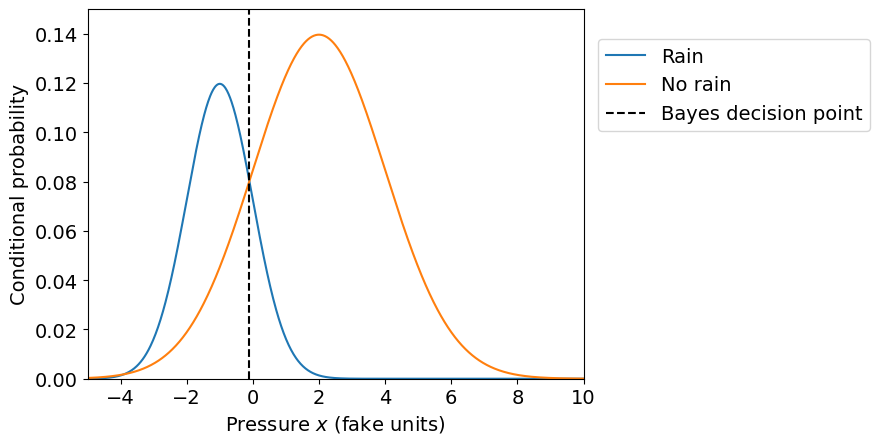

In [10]:
plot_rain_conditional_pdf(pressure, pdf_rain, pdf_norain, pressure_bayes)

We see that :
 - when $x < 0$, it is more likely to be raining,
 - when $x > 0$, it is more likely to be a sunny day.
 
The point $x = 0$ is the *Bayes decision boundary*.

It correspond to the pressure $x_0$ such that

\begin{equation}
    P(k = 1 | x = x_0) = P(k = 0 | x = x_0)\, .
\end{equation}

The Bayes classifier $G$ assigns all days for which $x < x_0$ to $k = 1$ and all other days to $k = 0$.

Note however that:
- there are days without rain for which $x < x_0$ and
- there are rainy days for which $x > x_0$.

The Bayes classifier $G$ is sometimes wrong!

### A Score for Classification

<hr>

**Misclassification Probability**
<br>
The *misclassification probability*, or risk, of the classifier $G$ is

\begin{equation}
    P(G(\boldsymbol X) \ne C)\, ,
\end{equation}

where $G(\boldsymbol x)$ is the class predicted by $G$ given $\boldsymbol x$.

<hr>

<hr>

**Proposition**
<br>

The Bayes classifier minimizes the misclassification probability.

<hr>

<div class="alert alert-block alert-warning">
    <b>Warning</b>
    
This is nice, BUT...

...applying the Bayes classifier requires knowing the *true* conditional probability distributions of all categories.

We do not know them in practice...
    
</div>

## Bayes theorem

**Issue:** The direct conditional probability $P(C = k | X = \boldsymbol x)$ is often hard to estimate from sparse data.

**Idea:** Use Bayes' theorem to relate it to $f_{ \boldsymbol X | C}(\boldsymbol x | k)$.

<hr>

**Bayes theorem**
<br>

\begin{equation}
P(C=k| \boldsymbol X = \boldsymbol x) = \frac{f_{ \boldsymbol X | C}(\boldsymbol x | k) P(C = k)}{f_{\boldsymbol X}(\boldsymbol x)}
\end{equation}

for all $\boldsymbol x \in \mathbb R^p$ and $k \in \{0, \ldots K - 1\}$ and where 

- $k \mapsto f_{\boldsymbol X|C}(\boldsymbol x | k)$ is called the *likelihood function*,
- $P(C = k)$ is the *prior* probability of observing some event $k$,
- $f_{\boldsymbol X}(\boldsymbol x) = \sum_{k = 0}^{K - 1} f_{ \boldsymbol X | C}(\boldsymbol x | k) P(C = k)$ is the input marginal PDF.

<hr>

### Caution with the likelihood

Given $k$, the *class density* $\boldsymbol x \mapsto f_{\boldsymbol X|C}(\boldsymbol x | k)$ is the probability density function of observing $\boldsymbol x$ given $C = k$.

It is indeed a function of $\boldsymbol x$ satisfying the two conditions for an integrable function to be a PDF.

However, at the end of the day, we are interested in finding $k$, not $\boldsymbol{x}$.

If we consider that $\boldsymbol x$ is given and $k$ is variable, then $k \mapsto f_{\boldsymbol X|C}(\boldsymbol x | k)$ is a function of $k$ and is no longer a probability: we call it a *likelihood*.

> ***Question***
> - We observe a temperature of the atmosphere of 3°C on a discrete scale. What does the likelihood of a rain/no rain random variable describe?
> - Does $P(3°C | \rm rain)$ and $P(3°C | \rm no~rain)$ sum up to 1?

### Prior

The prior $P(C=k)$, as its name indicates, is the probability of observing $C=k$ without any other information.

> ***Question***
> - Can you relate the joint probability density $f_{\boldsymbol X, C}(\boldsymbol x, k)$ to $f_{\boldsymbol X | C}(\boldsymbol x | k)$ and $P(C=k)$ to show that the latter is a normalization factor in the Bayes theorem.

## Generative models

By applying the Bayes theorem, we have shifted from a problem of estimating the conditional distribution $P(C=k| \boldsymbol X = \boldsymbol x)$ to estimating the likelihood $f_{\boldsymbol X|C}(\boldsymbol x | k)$.

But we still need methods to estimate the latter!

<hr>

**Generative Models**
<br>
Classification models based on the estimation of the class densities

\begin{equation}
    \boldsymbol x  \mapsto f_{\boldsymbol X | C}(\boldsymbol x | k)\, ,
\end{equation}

for all $k$.

<hr>

Once we have a model for these densities, we can use Bayes' theorem to infer the conditional probability distribution of the classes, namely 

\begin{equation}
P(C = k | \boldsymbol X = \boldsymbol x)\, ,
\end{equation}

from which the decision boundary can be drawn.

### Examples of generative models

- Linear and quadratic discriminant analysis (based on Gaussian densities),
- more flexible mixtures of Gaussians to allow for nonlinear boundaries,
- general nonparametric density estimates to provide more flexibility,
- Naive Bayes models which are a variant of the previous case and assume that each of the class densities are products of marginal densities (conditional independence).

### Linear Discriminant Analysis (LDA)

**Idea:** Assume that:
  - all class densities $\boldsymbol x  \mapsto f_{\boldsymbol X | C}(\boldsymbol x | k)$ are multivariate Gaussian $\mathcal{N}(\boldsymbol \mu_k, \mathbf \Sigma_k)$ and
  - the classes may have different ($p$-by-1) expectation vectors $\boldsymbol \mu_k$
  - but they have a common ($p$-by-$p$) covariance matrix $\mathbf \Sigma_k = \mathbf \Sigma$,
  
for all $k$.

#### Case with 1 predictor ($p = 1$)

First consider the case where there is only 1 input, that is $\boldsymbol x$ is a scalar (that we thus write $x$).

In LDA, we assume that, for each class, the data is distributed according to the *Gaussian distribution*

\begin{equation}
\hat f_{X|C}(x | k) = \frac{1}{\sqrt{2\pi}\sigma} \exp \left(  -\frac{1}{2} \frac{(x-\mu_k)^2}{\sigma^2}\right)\, .
\end{equation}

That is $f_{X|C}(x | k) \sim \mathcal N (\mu_k,\sigma^2)$ where the means $\mu_k$ are specific to each class, but the variance is common to all classes.

**LDA problem for $p = 1$:** Estimate $\sigma^2$ and $\mu_k$ for all $k$.

##### Learning LDA

We are given a training set $(x_i, k_i), 1 \le i \le N$.

To estimate the parameters $\mu_k$ and $\sigma^2$, suppose that we have $N_k$ observations in each class (with a total of $N$ observations).

We gather all the observations that belong to a class $k$ to compute the mean and variance of the class: 

\begin{equation}
\hat \mu_k = \frac{1}{N_k} \sum_{i, k_i = k} x_i
\end{equation}

\begin{equation}
\hat \sigma_k^2 = \frac{1}{N_k-1} \sum_{i, k_i = k} (x_i - \hat \mu_k)^2
\end{equation}

where the sums are over all the $i$'s such that the target class is $k$.

The unbiased sample estimate of the variance can be written as a weighted average of the class variances

\begin{equation}
\hat \sigma^2 = \frac{1}{N-K} \sum_{k = 0}^{K - 1} (N_k-1) \hat \sigma_k^2 
\end{equation}

So, for all $k$, the class densities $k \mapsto f_{X|C}(x | k)$ are then estimated by the  Gaussian distributions with means $\hat \mu_k$ and common variance $\hat \sigma^2$.

Remember that we are interested in $P(C = k | X = x)$, and in order to use Bayes' Theorem, we still need to estimate the priors $P(C = k)$ for all $k$.

> ***Question***
> - Given the training sample, what is $\hat P_k$, the most obvious estimate of $P(C = k)$, the probability that an observation falls into the class $k$?

##### Computing the posterior distribution

Given a new input $x$, we can now gather all bits and pieces to construct the *posterior probability distribution* for $x$ to be associated to a class $k$

\begin{equation}
\hat P(C = k | X = x) = \frac{\hat P_k ~ \hat f_{X|C}(x | k) }{\sum_{l = 0}^{K - 1}  \hat P_l ~ \hat f_{X|C}(x | l)}
\end{equation}

for all $k$.

##### Simplified classification using the discriminant function

We know that, for a given observation, we can assign the class $k$ that has the largest probability.

Since the log is a monotonic function, we can also compare the log of the probability and get the same result for our classification.

In the case of LDA, this means that we can assign an observation to the class for which 

\begin{equation}
\delta_k (x) = x \frac{\mu_k}{\sigma^2} - \frac{\mu_k^2}{2\sigma^2} + \log(P_k)
\end{equation}

is the highest.

This quantity is called the *discriminant function*.

Also, $\delta_k(x) = \delta_l(x)$ for any $k = l$ gives (a piece of) the decision boundary.

> ***Question (optional)***
> - Derive the equation of the linear discriminant function.

We get that the discriminant is a *linear* function of $x$.

It is linear because all class densities $f_{X|C}(x | k)$ have the same variance for all classes.

This causes the nonlinear term to cancel in the expression of the discriminant.

#### Generalization of LDA to  $p>1$

All the formalism holds in higher dimensions: the likelihood in a $p$-dimensional space is

\begin{equation}
\hat f_{\boldsymbol X | C}(\boldsymbol x | k) = \frac{1}{(2\pi)^{p/2}|\boldsymbol{\Sigma}|^{1/2}} \exp \left(-\frac{1}{2} (\boldsymbol x - \boldsymbol \mu_k)^\top \boldsymbol{\Sigma}^{-1}(\boldsymbol x - \boldsymbol \mu_k)\right)\, ,
\end{equation}

where $\boldsymbol \Sigma$ is the covariance matrix and $|\boldsymbol \Sigma|^{1/2}$ is the square root of the determinant of that matrix.

For $p>1$ the discriminant function is

\begin{equation}
\delta_k (\boldsymbol x) = \boldsymbol x^\top \boldsymbol \Sigma^{-1} \boldsymbol \mu_k - \frac{1}{2} \boldsymbol \mu_k^\top \boldsymbol \Sigma^{-1} \boldsymbol \mu_k  + \log(P_k)
\end{equation}

This expression is very similar to the 1D case, except that we now handle vectors and matrices instead of scalars.

#### Pros and cons of LDA

**Pros:** Few parameters to adjust (method not prone to overfitting).

**Cons:** Each class does not necessarily have the same variance nor follow the same parametric distribution.

**Alternative:** If we relax that approximation of equal variances, we get a decision boundary which is no longer linear: it is called *Quadratic Discriminant Analysis* (QDA).

<div class="alert alert-block alert-info">
    <b>LDA summary</b>
    
- Apply the Bayes theorem to inverse the problem (Generative model),
- Assume multivariate normal class densities with common covariance matrix,
- As a result, the decision boundary is linear.

</div>

## Naive Bayes

The Naive Bayes classifier is a popular method that share many similarities with LDA.

Like LDA, it is a generative model for which we try to estimate the class densities.

In order to estimate that probability, the naive Bayes methods *naively* assume that all variables are independent.

That is

\begin{equation}
f_{\boldsymbol X | C}(\boldsymbol x |k) = f_{X_1, C}(x_1 |k) ~ f_{X_2, C}(x_2 |k) \ldots f_{X_p, C}(x_p |k)
\end{equation}

for all $k$, and also

\begin{equation}
f_{\boldsymbol X}(\boldsymbol x) = f_{X_1}(x_1) ~ f_{X_2}(x_2) \ldots f_{X_p}(x_p)
\end{equation}

which we will need for the normalization in Bayes' theorem.

<div class="alert alert-block alert-warning">
    <b>Warning</b>

This hypothesis of independent features is strong.

This method should not be used when strong dependences exist between features.

Classification of images, for instance, often fail because nearby pixels are correlated.
</div>

Still attractive:
- because is is much simpler to estimate 1D marginal PDFs rather than $p$-dimensional PDFs,
- it is useful when the number of features $p$ is bigger than the number of observations $N$.

To estimate these marginal PDFs, we can use any method like Gaussian kernels, histograms, etc.

## To go further

- Using Gaussian mixtures to model the class densities, leading to nonlinear decision boundaries (Chap. 6 in Hastie *et al.* 2009).
- Using nonparametric density estimates for each class density (Chap. 6 in Hastie *et al.* 2009).

## References

- [Hastie, T., Tibshirani, R., Friedman, J., 2009. The Elements of Statistical Learning, 2nd ed. Springer, New York. ](https://doi.org/10.1007/978-0-387-84858-7).
- [James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). *An introduction to statistical learning* (Vol. 112, p. 18). New York: springer.](https://www.statlearning.com/)

***
## Credit

[//]: # "This notebook is part of [E4C Interdisciplinary Center - Education](https://gitlab.in2p3.fr/energy4climate/public/education)."
Contributors include Bruno Deremble and Alexis Tantet.

<br>

<div style="display: flex; height: 70px">
    
<img alt="Logo LMD" src="images/logos/logo_lmd.jpg" style="display: inline-block"/>

<img alt="Logo IPSL" src="images/logos/logo_ipsl.png" style="display: inline-block"/>

<img alt="Logo E4C" src="images/logos/logo_e4c_final.png" style="display: inline-block"/>

<img alt="Logo EP" src="images/logos/logo_ep.png" style="display: inline-block"/>

<img alt="Logo SU" src="images/logos/logo_su.png" style="display: inline-block"/>

<img alt="Logo ENS" src="images/logos/logo_ens.jpg" style="display: inline-block"/>

<img alt="Logo CNRS" src="images/logos/logo_cnrs.png" style="display: inline-block"/>
    
</div>

<hr>

<div style="display: flex">
    <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Creative Commons License" style="border-width:0; margin-right: 10px" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a>
    <br>This work is licensed under a &nbsp; <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Attribution-ShareAlike 4.0 International License</a>.
</div>